In [1]:
#import kagglehub
import pandas as pd
import numpy as np
import os
import plotly.express as px
#import cufflinks as cf
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Download the dataset to a directory
# path = kagglehub.dataset_download("mohithsairamreddy/salary-data")

# Read the CSV file into a DataFrame
# df = pd.read_csv(os.path.join(path, "Salary_Data.csv"))
df = pd.read_csv("/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv")
df_original = df.copy()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


# Data Cleaning

## Cast the object data type into category data types

In [3]:
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title'] = df['Job Title'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


## Ensure numeric fields are numeric

In [4]:
df['Age'] = df['Age'].astype(float)
df['Years of Experience'] = df['Years of Experience'].astype(float)
df['Salary'] = df['Salary'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


## Check for null values

In [5]:
# Check for missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
#If there are missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## Check for duplicated values

In [8]:
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows
# print(duplicate_rows)

Number of duplicate rows: 4911


In [9]:
# Remove duplicate rows (keeps first occurrence by default)
df = df.drop_duplicates()

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [10]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


## Standardize Text Values

In [11]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()

df.dtypes

Age                     float64
Gender                 category
Education Level        category
Job Title              category
Years of Experience     float64
Salary                  float64
dtype: object

## Summary of statistics

In [12]:
print(df.describe(include='all'))

                Age Gender    Education Level                  Job Title  \
count   1787.000000   1787               1787                       1787   
unique          NaN      3                  7                        191   
top             NaN   Male  Bachelor's Degree  Software Engineer Manager   
freq            NaN    966                506                        127   
mean      35.139899    NaN                NaN                        NaN   
std        8.213045    NaN                NaN                        NaN   
min       21.000000    NaN                NaN                        NaN   
25%       29.000000    NaN                NaN                        NaN   
50%       33.000000    NaN                NaN                        NaN   
75%       41.000000    NaN                NaN                        NaN   
max       62.000000    NaN                NaN                        NaN   

        Years of Experience         Salary  
count           1787.000000    1787.000000

In [13]:
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (1787, 6)


## Check the outliers

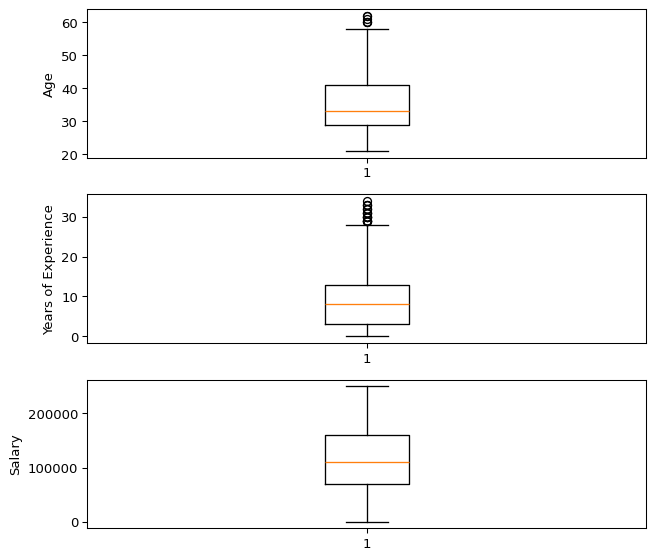

In [14]:
# Identify only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2))
i = 0
for col in numeric_cols:
    axs[i].boxplot(df[col], vert=True) # Set vert=False for horizontal boxplots
    axs[i].set_ylabel(col)
    i+=1
plt.tight_layout()
plt.show()

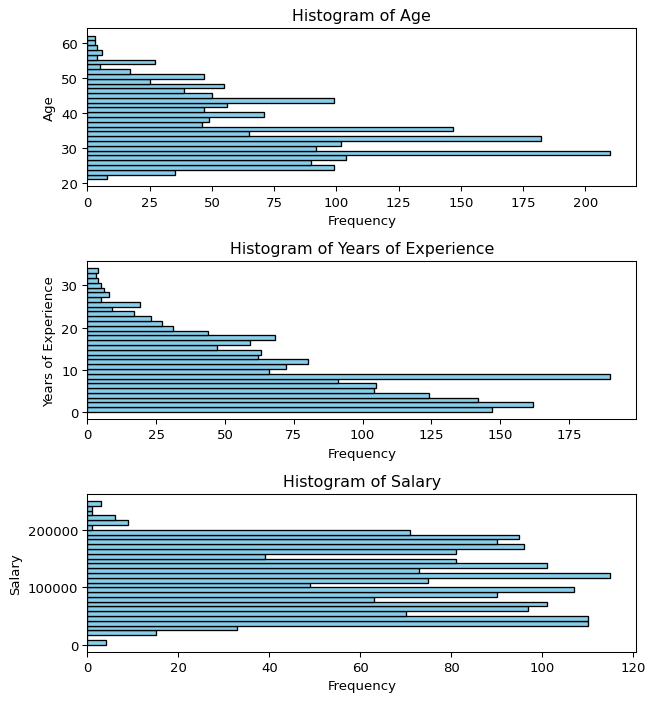

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create one subplot per numeric column
fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2.5))

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', orientation='horizontal') # Set orientation='horizontal' for horizontal histograms
    axs[i].set_title(f"Histogram of {col}")
    axs[i].set_xlabel("Frequency") # Swap xlabel and ylabel for horizontal
    axs[i].set_ylabel(col) # Swap xlabel and ylabel for horizontal

plt.tight_layout()
plt.show()

In [16]:
# Identify only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Loop through each numerical column and apply IQR method
for col in numeric_cols:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out outliers for this column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# The DataFrame df now has outliers removed from all numeric columns
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (1761, 6)


In [17]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df['Salary']))
print("Kurtosis:", kurtosis(df['Salary']))

Skewness: 0.09642479691218055
Kurtosis: -1.0957167324545287


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Create subplot layout
fig = make_subplots(rows=len(numeric_cols), cols=1, shared_xaxes=False,
                    subplot_titles=[f'Boxplot of {col}' for col in numeric_cols],
                    vertical_spacing=0.1)

# Add one boxplot per numeric column
for i, col in enumerate(numeric_cols, start=1):
    fig.add_trace(
        go.Box(x=df[col], name=col, orientation='h', marker_color='lightblue'),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=300 * len(numeric_cols), title_text="Boxplots for All Numerical Columns", showlegend=True)

fig.show()


In [19]:
print("Original dataset size:", df_original.shape)
print("After removing outliers:", df.shape)

Original dataset size: (6704, 6)
After removing outliers: (1761, 6)


In [20]:
print(df.describe())

               Age  Years of Experience         Salary
count  1761.000000          1761.000000    1761.000000
mean     34.833049             8.863146  112120.273140
std       7.864077             6.430839   51180.245032
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   68000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  155000.000000
max      58.000000            28.000000  250000.000000


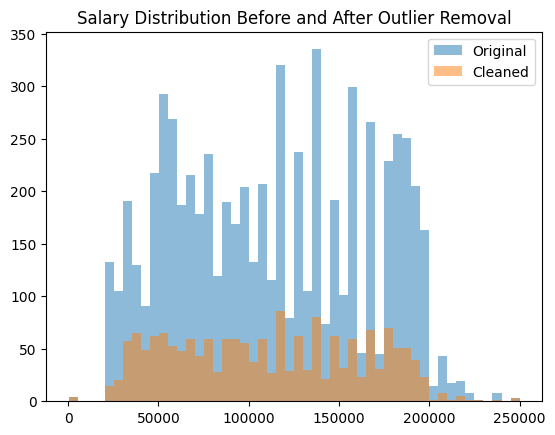

In [21]:
import matplotlib.pyplot as plt

plt.hist(df_original['Salary'], bins=50, alpha=0.5, label='Original')
plt.hist(df['Salary'], bins=50, alpha=0.5, label='Cleaned')
plt.legend()
plt.title("Salary Distribution Before and After Outlier Removal")
plt.show()

# Data Preprocessing

## Encode Categorical Features using Label Encoding

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 0 to 1786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1761 non-null   float64 
 1   Gender               1761 non-null   category
 2   Education Level      1761 non-null   category
 3   Job Title            1761 non-null   category
 4   Years of Experience  1761 non-null   float64 
 5   Salary               1761 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 68.0 KB


In [23]:
features = ['Age','Gender', 'Education Level', 'Job Title','Years of Experience']
target = 'Salary'

### check how many unique values are in each column

In [24]:
print(df[features].nunique())

Age                     38
Gender                   3
Education Level          7
Job Title              191
Years of Experience     31
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

for col in features:
    if df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


## Split Data into Train/Test Sets

In [26]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
print("Final dataset shape:", df.shape)
print("Features:", X.columns.tolist())
print("Target:", target)

Final dataset shape: (1761, 6)
Features: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
Target: Salary


### Correlation

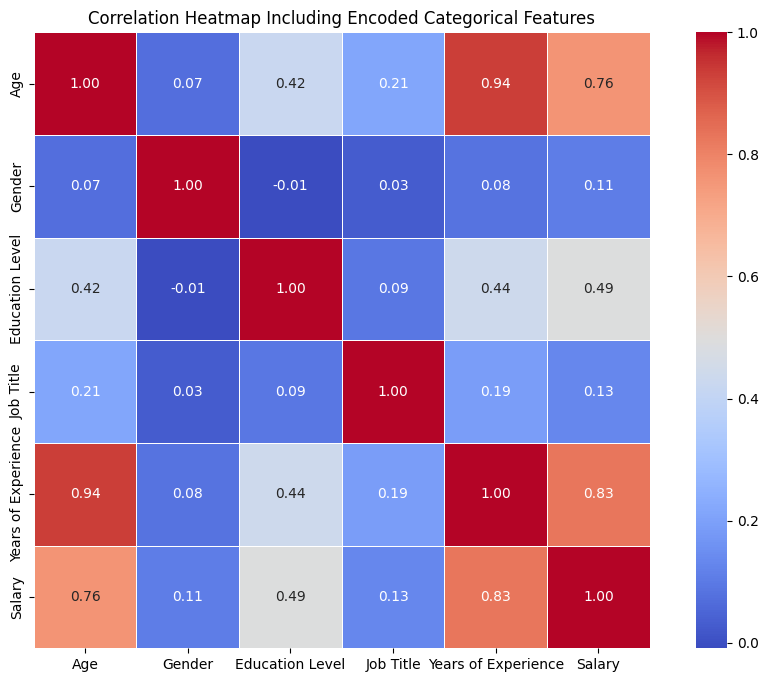

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation on all numeric columns (including encoded categorical)
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap Including Encoded Categorical Features")
plt.show()

## Focus on Correlation with a Target - Salary

In [29]:
target = 'Salary'
correlations = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print(correlations)


Salary                 1.000000
Years of Experience    0.827170
Age                    0.763189
Education Level        0.494529
Job Title              0.132132
Gender                 0.108151
Name: Salary, dtype: float64


In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R² Score: 0.9169842239548527
Mean Salary: 112120.27314026121
Mean Absolute Error (MAE): 8683.61911296034
RMSE: 14590.220429223313
Mean Squared Error (MSE): 212874532.17332533
